In [297]:
import pandas as pd

data_wine_red = pd.read_csv('./data/winequality-red.csv',delimiter=';')

data_wine_red.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [298]:
data_wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [299]:
data_wine_red.shape

(1599, 12)

<AxesSubplot: xlabel='quality', ylabel='count'>

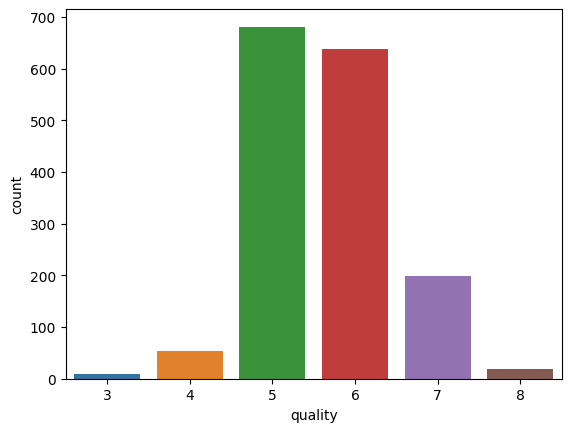

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = data_wine_red.quality)

In [301]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(data_wine_red[data_wine_red.columns[~data_wine_red.columns.isin(['quality'])]])

scalerY = StandardScaler()
y_scaled = scalerY.fit_transform(data_wine_red[data_wine_red.columns[data_wine_red.columns.isin(['quality'])]])
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,3.732682e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00


In [302]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

pca_features = pca.fit_transform(X_scaled)

print('Shape before PCA: ', X_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

data_scaled_pca = pd.DataFrame(
    data=pca_features
)

data_scaled_pca['quality'] = y_scaled

print(data_scaled_pca.describe())

Shape before PCA:  (1599, 11)
Shape after PCA:  (1599, 8)
                 0             1             2             3             4  \
count  1599.000000  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03   
mean      0.000000  1.777468e-17  1.777468e-17  1.777468e-17 -6.665504e-18   
std       1.760986  1.388206e+00  1.245598e+00  1.101813e+00  9.797410e-01   
min      -5.387623 -3.417517e+00 -3.655316e+00 -4.472835e+00 -3.048917e+00   
25%      -1.284754 -9.466001e-01 -8.983770e-01 -4.619438e-01 -6.122579e-01   
50%      -0.156804 -1.034292e-01 -7.798049e-02 -7.347862e-02 -1.036633e-01   
75%       1.022797  7.805751e-01  7.647279e-01  2.700453e-01  3.957818e-01   
max       8.653324  6.809866e+00  5.973211e+00  1.089274e+01  6.347114e+00   

                  5             6             7       quality  
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  
mean   3.554936e-17 -2.666202e-17  8.887339e-18  8.887339e-17  
std    8.124168e-01  7.643013e-01  6.505547e-01

In [303]:
pca.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138])

In [304]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled_pca[data_scaled_pca.columns[~data_scaled_pca.columns.isin(['quality'])]], data_scaled_pca.quality, test_size=0.25)
#X_train, X_test, y_train, y_test = train_test_split(data_wine_red[data_wine_red.columns[~data_wine_red.columns.isin(['quality'])]], data_wine_red.quality, test_size=0.25)

X_train.head()

,0,1,2,3,4,5,6,7
1327,-1.323351,-0.572437,0.534041,0.243072,-0.479821,-0.085233,0.529932,-0.097534
480,4.434488,2.093532,-0.721429,-4.472835,6.253933,-1.131913,2.922460,2.929773
827,-1.108279,-0.240988,-0.036423,-0.566185,0.076898,0.035091,0.773634,0.020532
842,1.543998,0.898163,1.247210,0.063609,-0.293961,0.632135,-0.608408,-0.844150
1174,-0.325599,0.787834,0.583635,-0.014715,-1.004390,-1.251364,0.584034,-0.719879


In [305]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

y_pred_neigh = neigh.predict(X_test)

r2_score(y_test,y_pred_neigh)

0.3230581572642125

In [306]:
inscaled_y_test = scalerY.inverse_transform(pd.DataFrame(y_test)).round()
inscaled_y_test

array([[6.],
       [5.],
       [6.],
       [8.],
       [6.],
       [6.],
       [7.],
       [7.],
       [7.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [7.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [4.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [8.],
       [6.],
       [6.],
       [5.],
       [6.],
       [7.],
       [5.],
       [5.],
       [5.],
       [4.],
       [6.],
       [4.],
       [6.],
       [6.],
       [5.],
       [7.],
       [8.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [4.],
       [5.],
       [3.],

In [307]:
inscaled_y_pred_neigh = scalerY.inverse_transform(pd.DataFrame(y_pred_neigh)).round()
inscaled_y_pred_neigh

array([[6.],
       [5.],
       [5.],
       [7.],
       [6.],
       [6.],
       [7.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [7.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [4.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],

In [308]:
r2_score(inscaled_y_test,inscaled_y_pred_neigh)

0.2611631452842518

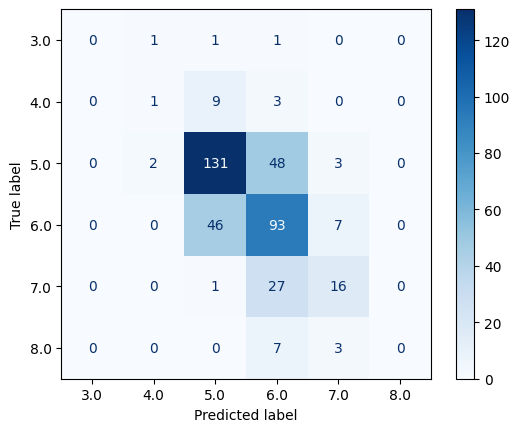

In [309]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(inscaled_y_test,inscaled_y_pred_neigh,cmap='Blues')

plt.show()

In [310]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr = SVR()
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

r2_score(y_test,y_pred_svr)

0.41543461930524794

In [311]:
inscaled_y_test

array([[6.],
       [5.],
       [6.],
       [8.],
       [6.],
       [6.],
       [7.],
       [7.],
       [7.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [7.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [4.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [8.],
       [6.],
       [6.],
       [5.],
       [6.],
       [7.],
       [5.],
       [5.],
       [5.],
       [4.],
       [6.],
       [4.],
       [6.],
       [6.],
       [5.],
       [7.],
       [8.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [4.],
       [5.],
       [3.],

In [312]:
inscaled_y_pred_svr = scalerY.inverse_transform(pd.DataFrame(y_pred_svr)).round()
inscaled_y_pred_svr

array([[6.],
       [5.],
       [5.],
       [7.],
       [6.],
       [6.],
       [7.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [7.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [6.],

In [313]:
r2_score(inscaled_y_test,inscaled_y_pred_svr)

0.30646917882814206

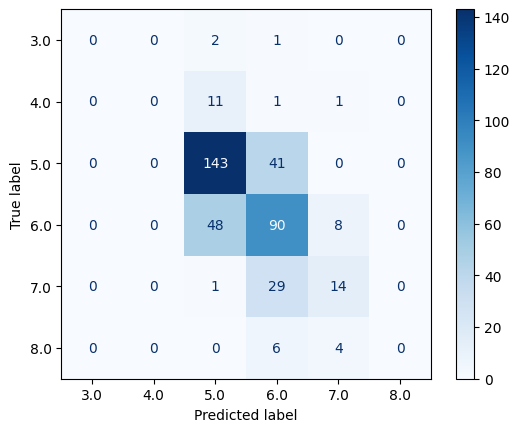

In [314]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(inscaled_y_test,inscaled_y_pred_svr,cmap='Blues')

plt.show()